In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import re
import joblib

In [2]:
#reading the datasets
df1= pd.read_csv("_airlines.csv")
df2=pd.read_csv("Airline_Reviews.csv")
df3=pd.read_csv("singapore_airlines_reviews.csv")

In [3]:
df1

tweet_id airline_sentiment  airline_sentiment_confidence  \
0      570306133677760513           neutral                        1.0000   
1      570301130888122368          positive                        0.3486   
2      570301083672813571           neutral                        0.6837   
3      570301031407624196          negative                        1.0000   
4      570300817074462722          negative                        1.0000   
...                   ...               ...                           ...   
14635  569587686496825344          positive                        0.3487   
14636  569587371693355008          negative                        1.0000   
14637  569587242672398336           neutral                        1.0000   
14638  569587188687634433          negative                        1.0000   
14639  569587140490866689           neutral                        0.6771   

               negativereason  negativereason_confidence         airline  \
0                         NaN                        NaN  Virgin America   
1                         NaN                     0.0000  Virgin America   
2                         NaN                        NaN  Virgin America   
3                  Bad Flight                     0.7033  Virgin America   
4                  Can't Tell                     1.0000  Virgin America   
...                       ...                        ...             ...   
14635                     NaN                     0.0000        American   
14636  Customer Service Issue                     1.0000        American   
14637                     NaN                        NaN        American   
14638  Customer Service Issue                     0.6659        American   
14639                     NaN                     0.0000        American   

      airline_sentiment_gold             name negativereason_gold  \
0                        NaN          cairdin                 NaN   
1                        NaN         jnardino                 NaN   
2                        NaN       yvonnalynn                 NaN   
3                        NaN         jnardino                 NaN   
4                        NaN         jnardino                 NaN   
...                      ...              ...                 ...   
14635                    NaN  KristenReenders                 NaN   
14636                    NaN         itsropes                 NaN   
14637                    NaN         sanyabun                 NaN   
14638                    NaN       SraJackson                 NaN   
14639                    NaN        daviddtwu                 NaN   

       retweet_count                                               text  \
0                  0                @VirginAmerica What @dhepburn said.   
1                  0  @VirginAmerica plus you've added commercials t...   
2                  0  @VirginAmerica I didn't today... Must mean I n...   
3                  0  @VirginAmerica it's really aggressive to blast...   
4                  0  @VirginAmerica and it's a really big bad thing...   
...              ...                                                ...   
14635              0  @AmericanAir thank you we got on a different f...   
14636              0  @AmericanAir leaving over 20 minutes Late Flig...   
14637              0  @AmericanAir Please bring American Airlines to...   
14638              0  @AmericanAir you have my money, you change my ...   
14639              0  @AmericanAir we have 8 ppl so we need 2 know h...   

      tweet_coord              tweet_created tweet_location  \
0             NaN  2015-02-24 11:35:52 -0800            NaN   
1             NaN  2015-02-24 11:15:59 -0800            NaN   
2             NaN  2015-02-24 11:15:48 -0800      Lets Play   
3             NaN  2015-02-24 11:15:36 -0800            NaN   
4             NaN  2015-02-24 11:14:45 -0800            NaN   
...           ...                        ...            ...   
14635   

In [4]:
df2

Unnamed: 0   Airline Name Overall_Rating  \
0               0    AB Aviation              9   
1               1    AB Aviation              1   
2               2    AB Aviation              1   
3               3  Adria Airways              1   
4               4  Adria Airways              1   
...           ...            ...            ...   
23166       23166         ZIPAIR              1   
23167       23167         ZIPAIR              1   
23168       23168         ZIPAIR              3   
23169       23169         ZIPAIR              6   
23170       23170         ZIPAIR              1   

                                 Review_Title          Review Date  Verified  \
0                     "pretty decent airline"   11th November 2019      True   
1                        "Not a good airline"       25th June 2019      True   
2              "flight was fortunately short"       25th June 2019      True   
3         "I will never fly again with Adria"  28th September 2019     False   
4       "it ruined our last days of holidays"  24th September 2019      True   
...                                       ...                  ...       ...   
23166          "customer service is terrible"        5th July 2022     False   
23167                    "Avoid at all costs"        1st June 2022      True   
23168          "Will not recommend to anyone"        31st May 2022      True   
23169             "It was immaculately clean"        23rd May 2022      True   
23170  "lost all of our money with no refund"        20th May 2022      True   

                                                  Review       Aircraft  \
0        Moroni to Moheli. Turned out to be a pretty ...            NaN   
1       Moroni to Anjouan. It is a very small airline...           E120   
2        Anjouan to Dzaoudzi. A very small airline an...  Embraer E120    
3        Please do a favor yourself and do not fly wi...            NaN   
4       Do not book a flight with this airline! My fr...            NaN   
...                                                  ...            ...   
23166   Bangkok to Tokyo. I’ve flown many low cost ai...            NaN   
23167    Avoid at all costs. I booked flights to go f...            NaN   
23168    Flight was leaving at 23.15 and after an hou...            NaN   
23169   Zipair is JAL’s budget airline. They don’t ha...     Dreamliner   
23170    They lied about connection in Narita and we ...            NaN   

      Type Of Traveller       Seat Type                             Route  \
0          Solo Leisure   Economy Class                  Moroni to Moheli   
1          Solo Leisure   Economy Class                 Moroni to Anjouan   
2          Solo Leisure   Economy Class               Anjouan to Dzaoudzi   
3          Solo Leisure   Economy Class             Frankfurt to Pristina   
4        Couple Leisure   Economy Class  Sofia to Amsterdam via Ljubljana   
...                 ...             ...                               ...   
23166    Couple Leisure   Economy Class                  Bangkok to Tokyo   
23167      Solo Leisure   Economy Class                Singapore to Tokyo   
23168          Business   Economy Class                  Bangkok to Tokyo   
23169          Business  Business Class              Tokyo to Los Angeles   
23170      Solo Leisure   Economy Class                Singapore to Tokyo   

           Date Flown  Seat Comfort  Cabin Staff Service  Food & Beverages  \
0       November 2019           4.0                  5.0               4.0   
1           June 2019           2.0                  2.0               1.0   
2           June 2019           2.0                  1.0               1.0   
3      September 2019           1.0                  1.0               NaN   
4      September 2019           1.0                  1.0               1.0   
...               ...           ...                  ...               ...   
23166       June 2022           2.0                  1.0     

In [134]:
df3

published_date published_platform  rating    type  \
0     2024-03-12T14:41:14-04:00            Desktop       3  review   
1     2024-03-11T19:39:13-04:00            Desktop       5  review   
2     2024-03-11T12:20:23-04:00            Desktop       1  review   
3     2024-03-11T07:12:27-04:00            Desktop       5  review   
4     2024-03-10T05:34:18-04:00            Desktop       2  review   
...                         ...                ...     ...     ...   
9995  2018-08-06T03:48:21-04:00            Desktop       5  review   
9996  2018-08-05T22:50:29-04:00             Mobile       5  review   
9997  2018-08-05T22:47:06-04:00            Desktop       5  review   
9998  2018-08-05T20:32:03-04:00            Desktop       4  review   
9999  2018-08-05T20:19:51-04:00            Desktop       4  review   

                                                   text  \
0     We used this airline to go from Singapore to L...   
1     The service on Singapore Airlines Suites Class...   
2     Booked, paid and received email confirmation f...   
3     Best airline in the world, seats, food, servic...   
4     Premium Economy Seating on Singapore Airlines ...   
...                                                 ...   
9995  First part done with Singapore Airlines - acce...   
9996  And again a great Flight with Singapore Air. G...   
9997  We flew business class from Frankfurt, via Sin...   
9998  As always, the A380 aircraft was spotlessly pr...   
9999  As always, Singapore Airlines has done it agai...   

                                                  title  helpful_votes  
0                                                    Ok              0  
1     The service in Suites Class makes one feel lik...              0  
2                            Don’t give them your money              0  
3                             Best Airline in the World              0  
4     Premium Economy Seating on Singapore Airlines ...              0  
...                                                 ...            ...  
9995  Flew to NZ 1st half Singapore Airlines, 2nd ha...              1  
9996                                       Best Airline              1  
9997               Superb service on Singapore Airlines              1  
9998  A Comfortable Fiight Spoiled by lack of adequa...              2  
9999                           Delivered as expected :)              3  

[10000 rows x 7 columns]

In [5]:
df1_cols=['airline_sentiment','text']  #only selecting the important  columns

In [6]:
df1_cols

['airline_sentiment', 'text']

In [7]:
df1_fin=df1[df1_cols]  #creating the final dataframe from selected columns
 

In [8]:
df2.head()

Unnamed: 0   Airline Name Overall_Rating  \
0           0    AB Aviation              9   
1           1    AB Aviation              1   
2           2    AB Aviation              1   
3           3  Adria Airways              1   
4           4  Adria Airways              1   

                            Review_Title          Review Date  Verified  \
0                "pretty decent airline"   11th November 2019      True   
1                   "Not a good airline"       25th June 2019      True   
2         "flight was fortunately short"       25th June 2019      True   
3    "I will never fly again with Adria"  28th September 2019     False   
4  "it ruined our last days of holidays"  24th September 2019      True   

                                              Review       Aircraft  \
0    Moroni to Moheli. Turned out to be a pretty ...            NaN   
1   Moroni to Anjouan. It is a very small airline...           E120   
2    Anjouan to Dzaoudzi. A very small airline an...  Embraer E120    
3    Please do a favor yourself and do not fly wi...            NaN   
4   Do not book a flight with this airline! My fr...            NaN   

  Type Of Traveller      Seat Type                             Route  \
0      Solo Leisure  Economy Class                  Moroni to Moheli   
1      Solo Leisure  Economy Class                 Moroni to Anjouan   
2      Solo Leisure  Economy Class               Anjouan to Dzaoudzi   
3      Solo Leisure  Economy Class             Frankfurt to Pristina   
4    Couple Leisure  Economy Class  Sofia to Amsterdam via Ljubljana   

       Date Flown  Seat Comfort  Cabin Staff Service  Food & Beverages  \
0   November 2019           4.0                  5.0               4.0   
1       June 2019           2.0                  2.0               1.0   
2       June 2019           2.0                  1.0               1.0   
3  September 2019           1.0                  1.0               NaN   
4  September 2019           1.0                  1.0               1.0   

   Ground Service  Inflight Entertainment  Wifi & Connectivity  \
0             4.0                     NaN                  NaN   
1             1.0                     NaN                  NaN   
2             1.0                     NaN                  NaN   
3             1.0                     NaN                  NaN   
4             1.0                     1.0                  1.0   

   Value For Money Recommended  
0              3.0         yes  
1              2.0          no  
2              2.0          no  
3              1.0          no  
4              1.0          no

In [9]:
df2.dropna(inplace=True)  #dropping the null values

In [10]:
df2.columns

Index(['Unnamed: 0', 'Airline Name', 'Overall_Rating', 'Review_Title',
       'Review Date', 'Verified', 'Review', 'Aircraft', 'Type Of Traveller',
       'Seat Type', 'Route', 'Date Flown', 'Seat Comfort',
       'Cabin Staff Service', 'Food & Beverages', 'Ground Service',
       'Inflight Entertainment', 'Wifi & Connectivity', 'Value For Money',
       'Recommended'],
      dtype='object')

In [11]:
df2['Overall_Rating'].value_counts()

Overall_Rating
1    716
2    181
9    178
8    156
3    116
7     98
4     77
6     75
5     70
Name: count, dtype: int64

In [12]:
#deleting row with "Value For Money" value in Overall_Rating column
df2=df2[df2['Overall_Rating']!='Value For Money']

In [13]:
#changing the column Overall Rating to int
df2['Overall_Rating']=df2['Overall_Rating'].astype(np.float32)

In [14]:
#here we create lambda function to convert overall rating column to sentiment column  it has positive and negative and neutral sentiment
df2['sentiment'] = df2['Overall_Rating'].apply(lambda x: 'positive' if x > 5 else ('negative' if x < 5 else 'neutral'))

In [15]:
df2_fin=df2[['sentiment','Review']]  #selecting the important columns

In [16]:
df2_fin.dropna(inplace=True) #dropping null values

C:\Users\shaag\AppData\Local\Temp\ipykernel_14328\797133144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_fin.dropna(inplace=True) #dropping null values


In [17]:
df2_fin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1667 entries, 5 to 23169
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  1667 non-null   object
 1   Review     1667 non-null   object
dtypes: object(2)
memory usage: 39.1+ KB


In [18]:
df1_fin['sentiment']=df1_fin['airline_sentiment']  #copying a column

C:\Users\shaag\AppData\Local\Temp\ipykernel_14328\2330311165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_fin['sentiment']=df1_fin['airline_sentiment']  #copying a column


In [19]:
df1_fin.drop('airline_sentiment',axis=1,inplace=True) #dropping the copied column

C:\Users\shaag\AppData\Local\Temp\ipykernel_14328\2440490289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_fin.drop('airline_sentiment',axis=1,inplace=True) #dropping the copied column


In [20]:
df1_fin 

text sentiment
0                    @VirginAmerica What @dhepburn said.   neutral
1      @VirginAmerica plus you've added commercials t...  positive
2      @VirginAmerica I didn't today... Must mean I n...   neutral
3      @VirginAmerica it's really aggressive to blast...  negative
4      @VirginAmerica and it's a really big bad thing...  negative
...                                                  ...       ...
14635  @AmericanAir thank you we got on a different f...  positive
14636  @AmericanAir leaving over 20 minutes Late Flig...  negative
14637  @AmericanAir Please bring American Airlines to...   neutral
14638  @AmericanAir you have my money, you change my ...  negative
14639  @AmericanAir we have 8 ppl so we need 2 know h...   neutral

[14640 rows x 2 columns]

In [21]:
df2_fin.columns=['sentiment','text']  #changing the column names

In [22]:
df3['rating']=df3['rating'].astype(np.float32)  #changing the rating column to float

In [23]:
df3['sentiment'] = df3['rating'].apply(lambda x: 'positive' if x > 5 else ('negative' if x < 5 else 'neutral'))  #creating a sentiment column

In [24]:
df3_fin=df3[['text','sentiment']]  #selecting the important columns  

In [25]:
df3_fin

text sentiment
0     We used this airline to go from Singapore to L...  negative
1     The service on Singapore Airlines Suites Class...   neutral
2     Booked, paid and received email confirmation f...  negative
3     Best airline in the world, seats, food, servic...   neutral
4     Premium Economy Seating on Singapore Airlines ...  negative
...                                                 ...       ...
9995  First part done with Singapore Airlines - acce...   neutral
9996  And again a great Flight with Singapore Air. G...   neutral
9997  We flew business class from Frankfurt, via Sin...   neutral
9998  As always, the A380 aircraft was spotlessly pr...  negative
9999  As always, Singapore Airlines has done it agai...  negative

[10000 rows x 2 columns]

In [52]:
df_list=[df1_fin,df2_fin] #putting objects into a list

In [53]:
df=pd.concat(df_list) #concatenating them

In [54]:
df

text sentiment
0                    @VirginAmerica What @dhepburn said.   neutral
1      @VirginAmerica plus you've added commercials t...  positive
2      @VirginAmerica I didn't today... Must mean I n...   neutral
3      @VirginAmerica it's really aggressive to blast...  negative
4      @VirginAmerica and it's a really big bad thing...  negative
...                                                  ...       ...
23027   I was pleasantly surprised by XL Airways afte...  positive
23125    A small bottle of water is $2. Cup of coffee...  positive
23136   Very impressed. These seats are marketed as B...  positive
23152    It was my first time with ZipAir and I was a...  positive
23169   Zipair is JAL’s budget airline. They don’t ha...  positive

[16307 rows x 2 columns]

In [55]:
df.dropna(inplace=True) #dropping null rows

In [56]:
df

text sentiment
0                    @VirginAmerica What @dhepburn said.   neutral
1      @VirginAmerica plus you've added commercials t...  positive
2      @VirginAmerica I didn't today... Must mean I n...   neutral
3      @VirginAmerica it's really aggressive to blast...  negative
4      @VirginAmerica and it's a really big bad thing...  negative
...                                                  ...       ...
23027   I was pleasantly surprised by XL Airways afte...  positive
23125    A small bottle of water is $2. Cup of coffee...  positive
23136   Very impressed. These seats are marketed as B...  positive
23152    It was my first time with ZipAir and I was a...  positive
23169   Zipair is JAL’s budget airline. They don’t ha...  positive

[16307 rows x 2 columns]

<Axes: ylabel='count'>

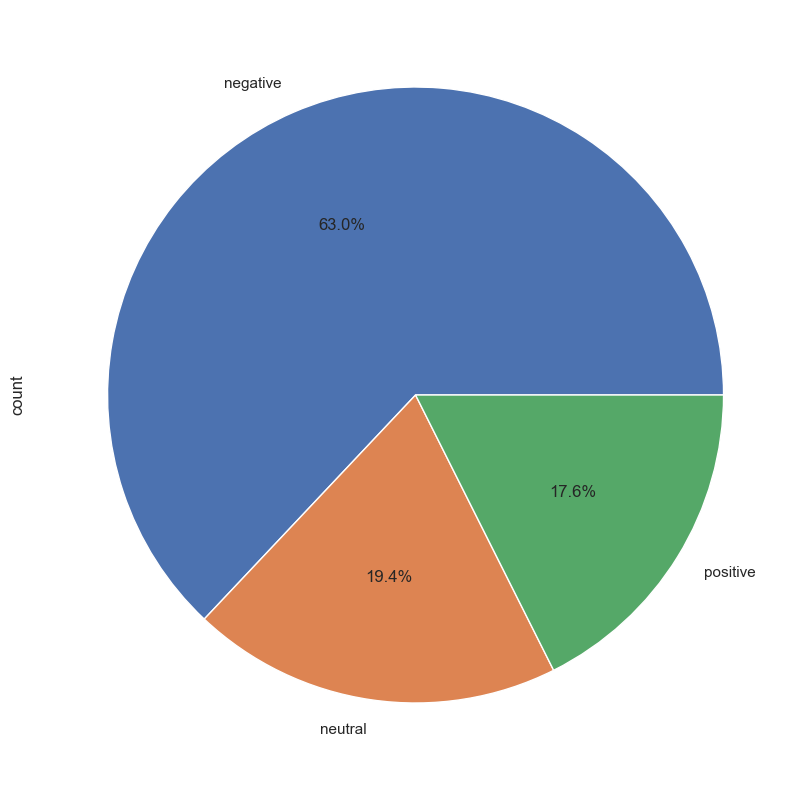

In [57]:
df['sentiment'].value_counts()  #checking the value counts of sentiment column
#lets create a pie chart to visualize the sentiment column
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(10,10))
df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%')


In [58]:
#downloading nltk modules
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shaag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shaag\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [59]:
df['sentiment'].unique()#listing unique values

array(['neutral', 'positive', 'negative'], dtype=object)

In [60]:
df.dropna(inplace=True)

In [61]:
#custom function to label encode the sentiments
def sentiments(sentimento):
    if sentimento == "positive":
        return 2
    elif sentimento == "neutral":
        return 1
    elif sentimento == "negative":
        return 0

# Applying the feeling function
df.sentiment = df.sentiment.apply(lambda x: sentiments(x))
print("Sentimentos:", df.sentiment)

Sentimentos: 0        1
1        2
2        1
3        0
4        0
        ..
23027    2
23125    2
23136    2
23152    2
23169    2
Name: sentiment, Length: 16307, dtype: int64


In [62]:
names=['delta', 'deltaair', 'united', 'unitedair', 'southwest', 'southwestair', 'usairways',
         'virginamerica', 'american', 'americanair', 'jetblue', 'jetblues', 'usairway',
         'flight', 'airline', 'airlines','rt','said']  #name of the airlines

In [63]:
final_df=df

In [64]:
#custom function to clean the data
def clean_data(x):
    text=x
    
    text = text.lower()
    text = re.sub('\[.*?\]', '', text) # remove square brackets
    text = re.sub(r'[^\w\s]','',text) # remove punctuation
    text = re.sub('\w*\d\w*', '', text) # remove words containing numbers
    text = re.sub('\n', '', text)
    return text
def clean_stopword(d):
    stop_words = stopwords.words('english')
    for name in names:
        stop_words.append(name)

    return " ".join([w.lower() for w in d.split() if w.lower() not in stop_words and len(w) > 1])



def tokenizelemmatize(d):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(d)
    return " ".join([lemmatizer.lemmatize(w) for w in tokens])

<>:6: SyntaxWarning: invalid escape sequence '\['
<>:8: SyntaxWarning: invalid escape sequence '\w'
<>:6: SyntaxWarning: invalid escape sequence '\['
<>:8: SyntaxWarning: invalid escape sequence '\w'
C:\Users\shaag\AppData\Local\Temp\ipykernel_14328\3118643348.py:6: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]', '', text) # remove square brackets
C:\Users\shaag\AppData\Local\Temp\ipykernel_14328\3118643348.py:8: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*', '', text) # remove words containing numbers


In [65]:
df['final_text']=df.text.apply(clean_data).apply(clean_stopword).apply(tokenizelemmatize)    #applying and chaining the operations

In [66]:
df.drop('text',axis=1,inplace=True) #dropping text column

In [67]:
df_fin=df.reset_index(drop=True)  #again resetting index

In [68]:
df_fin

sentiment                                         final_text
0              1                                           dhepburn
1              2       plus youve added commercial experience tacky
2              1       didnt today must mean need take another trip
3              0  really aggressive blast obnoxious entertainmen...
4              0                               really big bad thing
...          ...                                                ...
16302          2  pleasantly surprised xl airway critical review...
16303          2  small bottle water cup coffee certainly easy e...
16304          2  impressed seat marketed business class lite ie...
16305          2  first time zipair bit leery flying far budget ...
16306          2  zipair jals budget dont class travel pick seat...

[16307 rows x 2 columns]

In [69]:
!pip install wordcloud

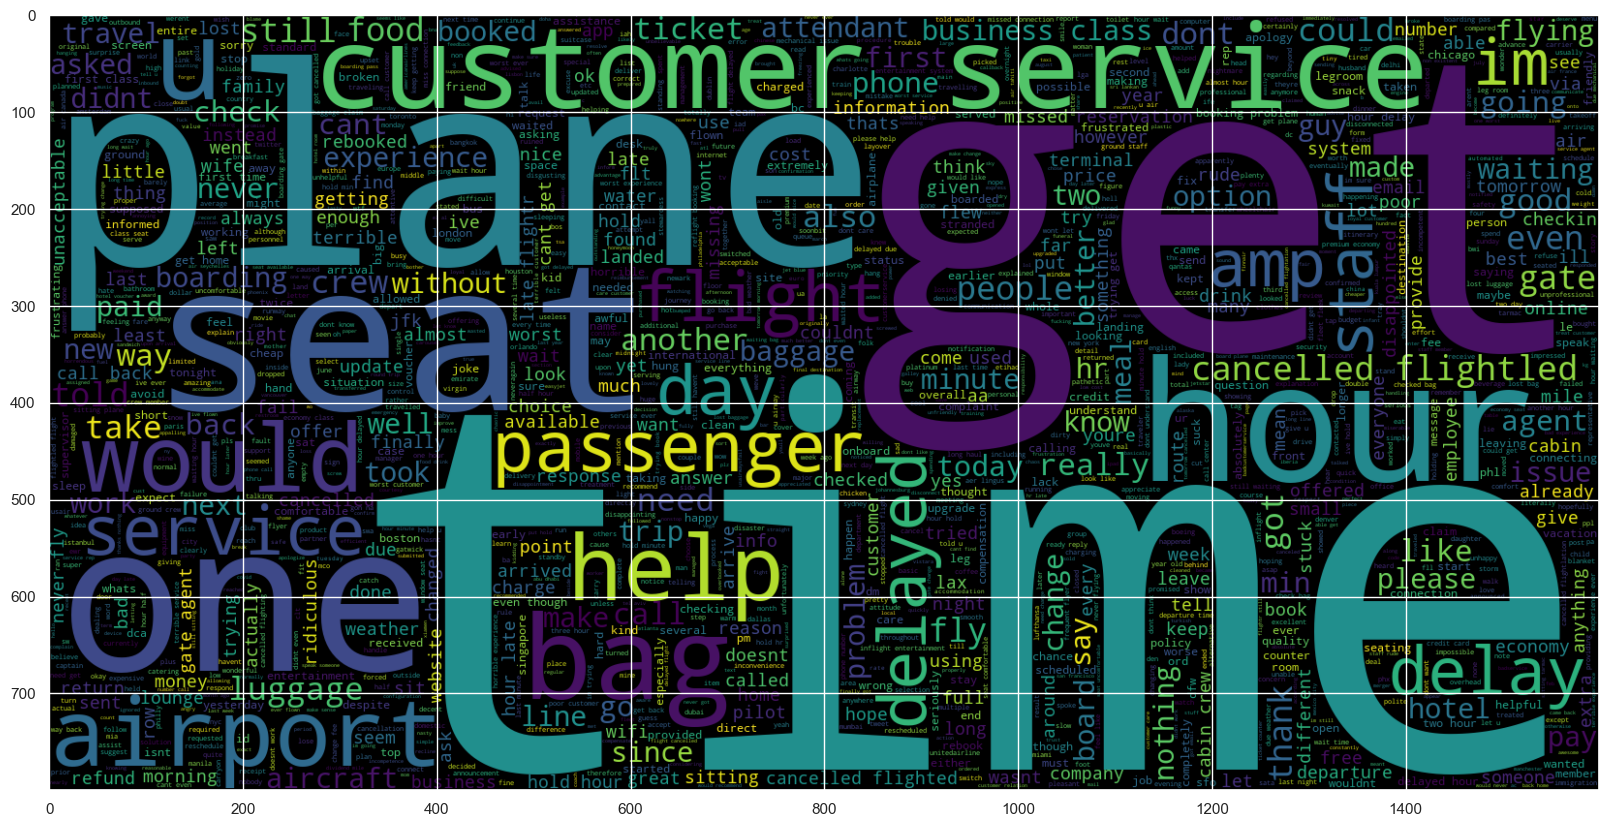

In [70]:
#lets create a wordcloud to visualize the most common words in all 3 sentiment
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stopwords.words('english')).generate(" ".join(df_fin[df_fin.sentiment==0].final_text))
plt.imshow(wc , interpolation = 'bilinear')


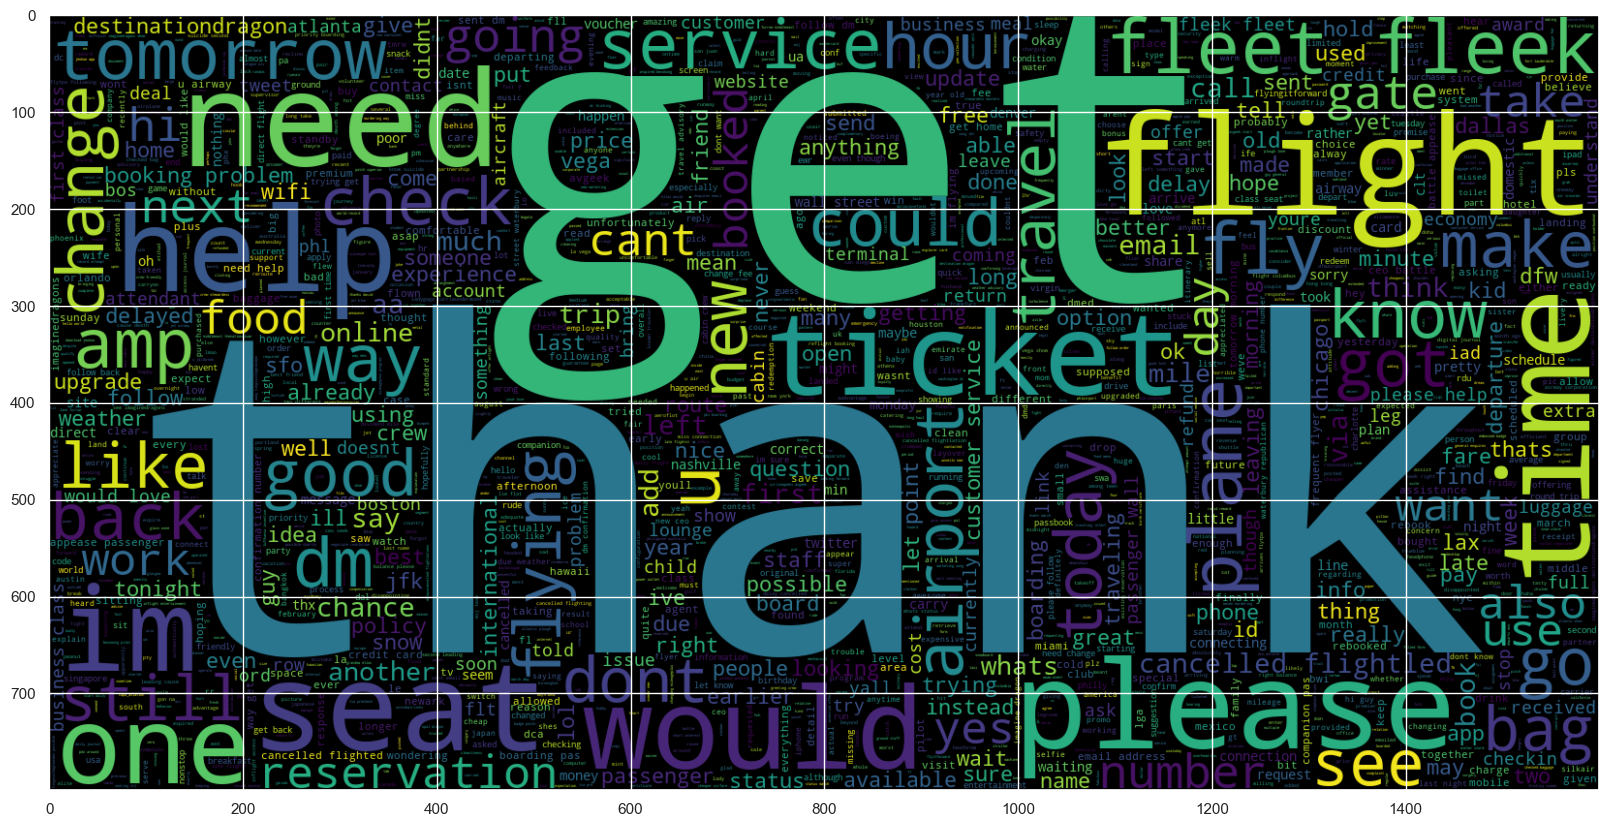

In [71]:
plt.figure(figsize=(20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stopwords.words('english')).generate(" ".join(df_fin[df_fin.sentiment==1].final_text))
plt.imshow(wc , interpolation = 'bilinear')

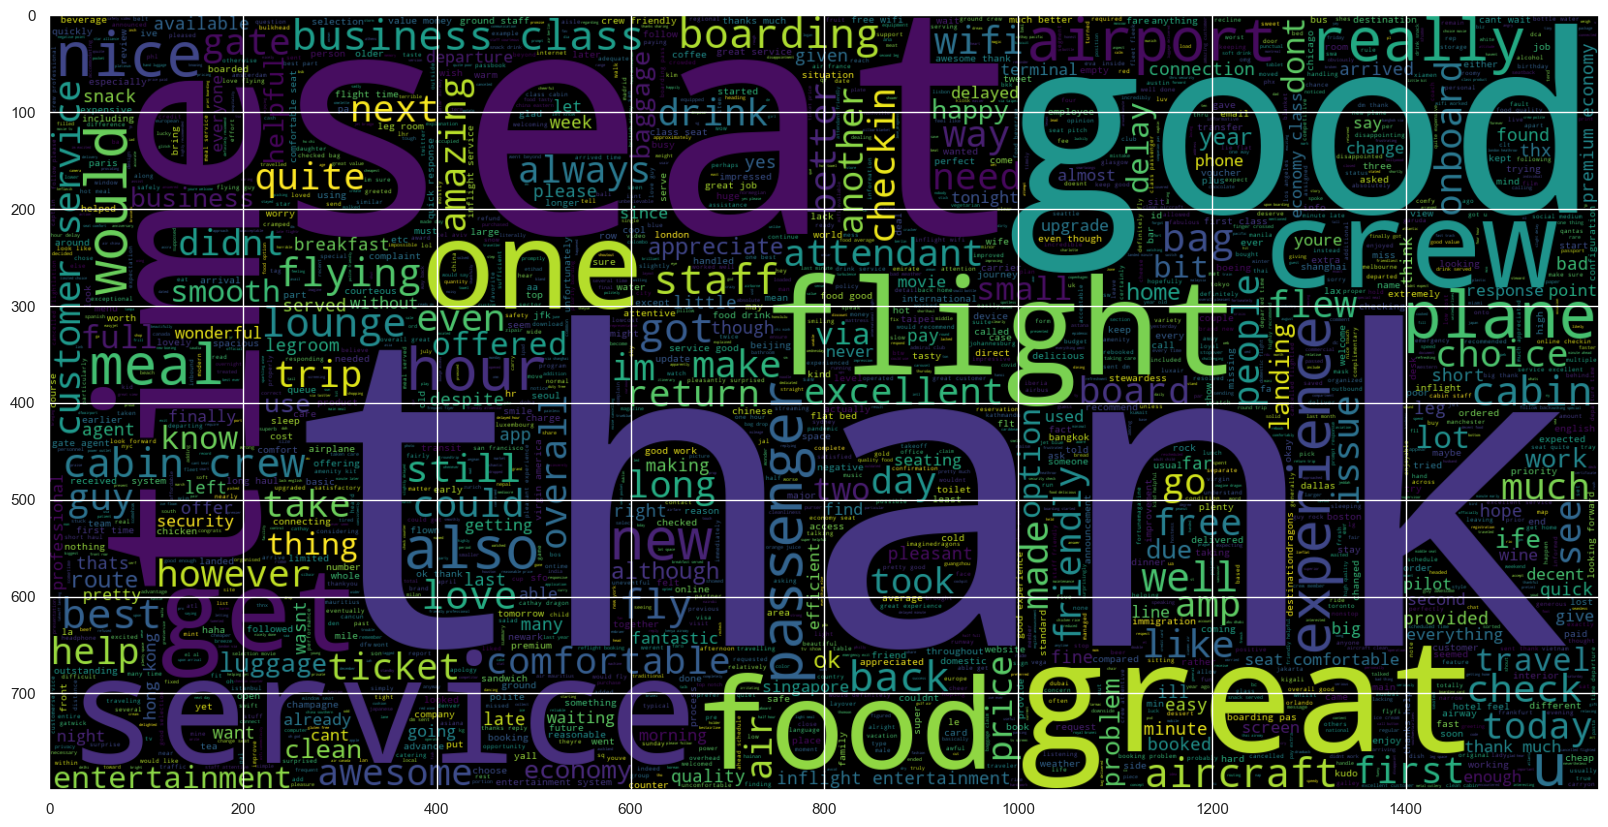

In [72]:
plt.figure(figsize=(20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stopwords.words('english')).generate(" ".join(df_fin[df_fin.sentiment==2].final_text))
plt.imshow(wc , interpolation = 'bilinear')

In [73]:
#putting features in X and target in y
X=df_fin.final_text
y=df_fin.sentiment

In [74]:
X

0                                                 dhepburn
1             plus youve added commercial experience tacky
2             didnt today must mean need take another trip
3        really aggressive blast obnoxious entertainmen...
4                                     really big bad thing
                               ...                        
16302    pleasantly surprised xl airway critical review...
16303    small bottle water cup coffee certainly easy e...
16304    impressed seat marketed business class lite ie...
16305    first time zipair bit leery flying far budget ...
16306    zipair jals budget dont class travel pick seat...
Name: final_text, Length: 16307, dtype: object

In [75]:
y

0        1
1        2
2        1
3        0
4        0
        ..
16302    2
16303    2
16304    2
16305    2
16306    2
Name: sentiment, Length: 16307, dtype: int64

In [79]:
#importing the necessary modules for ml
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, auc,precision_recall_curve, average_precision_score

In [80]:
#initializing the vectorizers
c = CountVectorizer()
X_c = c.fit_transform(X)


tf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None)
X_tf = tf.fit_transform(X)

In [81]:
X_tf

<16307x16952 sparse matrix of type '<class 'numpy.float64'>'
	with 215931 stored elements in Compressed Sparse Row format>

In [82]:
X_train,X_test,y_train,y_test=train_test_split(X_c,y,random_state=30,test_size=0.2) #splitting for tfidf

In [83]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X_tf,y,random_state=30,test_size=0.2) #splitting for count

In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [85]:
model_params = {'random_state':42}


LR=LogisticRegression(solver='liblinear')
MNB=MultinomialNB()
KNN=KNeighborsClassifier()
#initializing the models

LogisticRegression(solver='liblinear')
Accuracy: 0.7765174739423667
F1: 0.7704164763089818
Precision: 0.7678888111227394
Recall: 0.7765174739423667
Confusion Matrix: [[1866  141   86]
 [ 237  309   58]
 [ 144   63  358]]
Classification Report:               precision    recall  f1-score   support

           0       0.83      0.89      0.86      2093
           1       0.60      0.51      0.55       604
           2       0.71      0.63      0.67       565

    accuracy                           0.78      3262
   macro avg       0.72      0.68      0.69      3262
weighted avg       0.77      0.78      0.77      3262



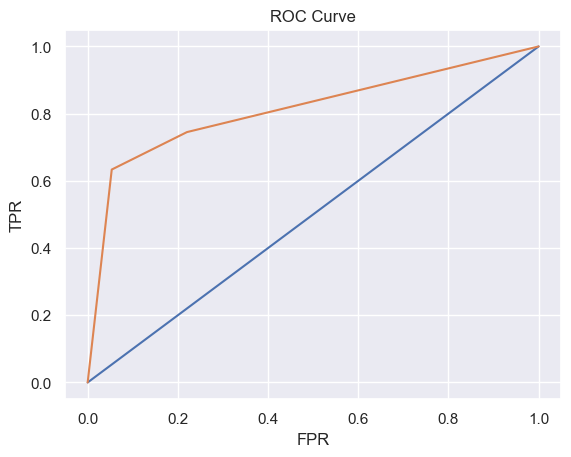

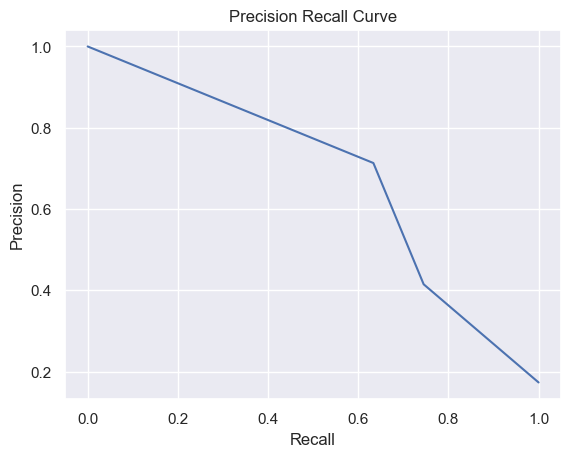

MultinomialNB()
Accuracy: 0.7547516860821581
F1: 0.7400197521412996
Precision: 0.7407398781689346
Recall: 0.7547516860821581
Confusion Matrix: [[1905  117   71]
 [ 311  248   45]
 [ 196   60  309]]
Classification Report:               precision    recall  f1-score   support

           0       0.79      0.91      0.85      2093
           1       0.58      0.41      0.48       604
           2       0.73      0.55      0.62       565

    accuracy                           0.75      3262
   macro avg       0.70      0.62      0.65      3262
weighted avg       0.74      0.75      0.74      3262



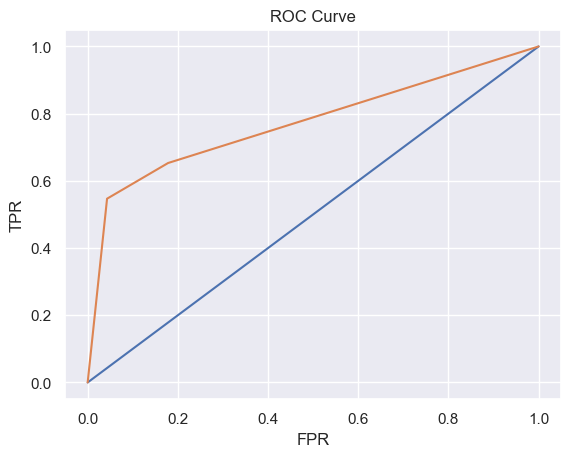

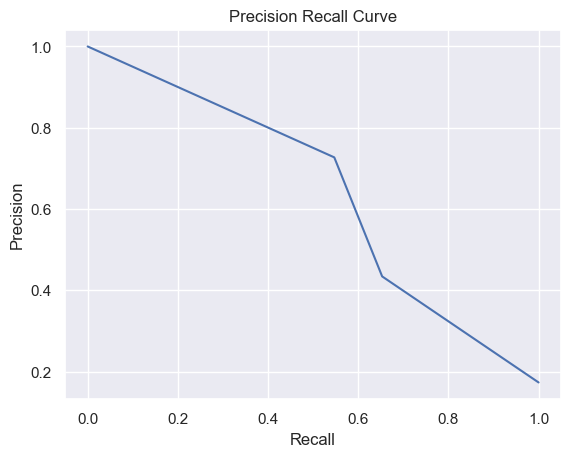

KNeighborsClassifier()
Accuracy: 0.5459840588595953
F1: 0.5764931109756136
Precision: 0.6919677082644077
Recall: 0.5459840588595953
Confusion Matrix: [[1078  904  111]
 [ 120  433   51]
 [ 104  191  270]]
Classification Report:               precision    recall  f1-score   support

           0       0.83      0.52      0.64      2093
           1       0.28      0.72      0.41       604
           2       0.62      0.48      0.54       565

    accuracy                           0.55      3262
   macro avg       0.58      0.57      0.53      3262
weighted avg       0.69      0.55      0.58      3262



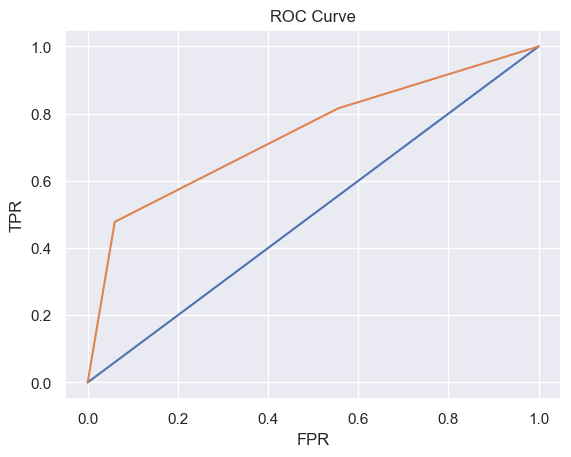

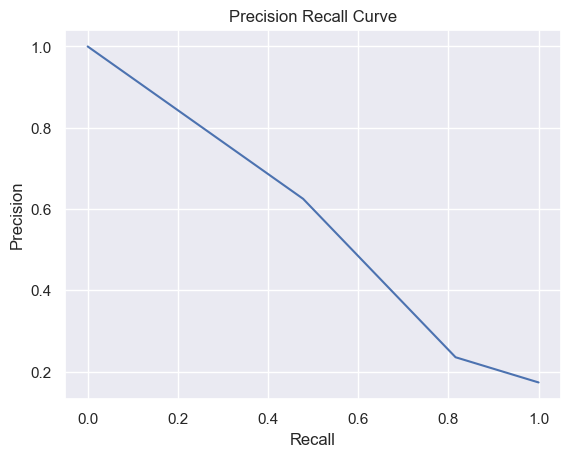

In [87]:
#let's fit the models and plot the curves
models = [LR,MNB,KNN]
for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(model)
    print('Accuracy:',accuracy_score(y_test,y_pred))
    print('F1:',f1_score(y_test,y_pred,average='weighted'))
    print('Precision:',precision_score(y_test,y_pred,average='weighted'))
    print('Recall:',recall_score(y_test,y_pred,average='weighted'))
    print('Confusion Matrix:',confusion_matrix(y_test,y_pred))
    print('Classification Report:',classification_report(y_test,y_pred))
    #plotting the roc curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=2)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    # Plotting our Baseline..
    plt.plot([0,1],[0,1])
    plt.plot(fpr, tpr)
    plt.title('ROC Curve')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()
    #plotting the precision recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred, pos_label=2)
    plt.figure()
    plt.plot(recall, precision)
    plt.title('Precision Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()
   




LogisticRegression(solver='liblinear')
Accuracy: 0.7801961986511343
F1: 0.7592852763026761
Precision: 0.77712944531211
Recall: 0.7801961986511343
Confusion Matrix: [[2001   55   37]
 [ 335  237   32]
 [ 222   36  307]]
Classification Report:               precision    recall  f1-score   support

           0       0.78      0.96      0.86      2093
           1       0.72      0.39      0.51       604
           2       0.82      0.54      0.65       565

    accuracy                           0.78      3262
   macro avg       0.77      0.63      0.67      3262
weighted avg       0.78      0.78      0.76      3262



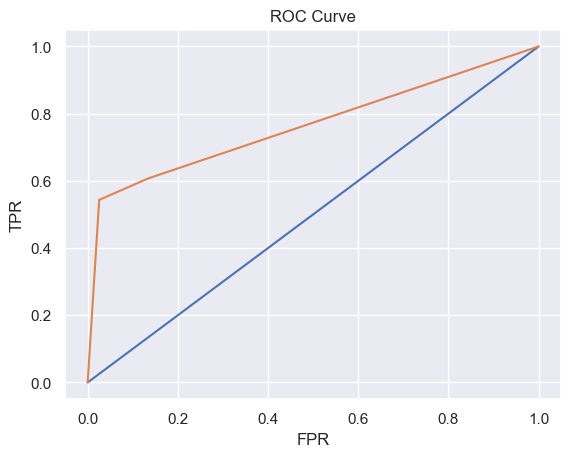

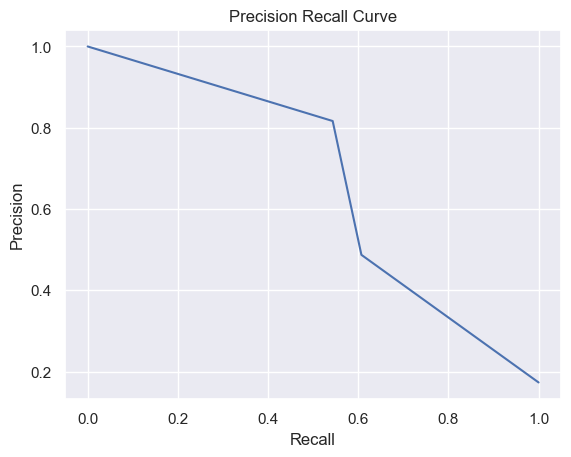

MultinomialNB()
Accuracy: 0.688534641324341
F1: 0.603088929183524
Precision: 0.7350101119463268
Recall: 0.688534641324341
Confusion Matrix: [[2084    7    2]
 [ 522   70   12]
 [ 463   10   92]]
Classification Report:               precision    recall  f1-score   support

           0       0.68      1.00      0.81      2093
           1       0.80      0.12      0.20       604
           2       0.87      0.16      0.27       565

    accuracy                           0.69      3262
   macro avg       0.78      0.42      0.43      3262
weighted avg       0.74      0.69      0.60      3262



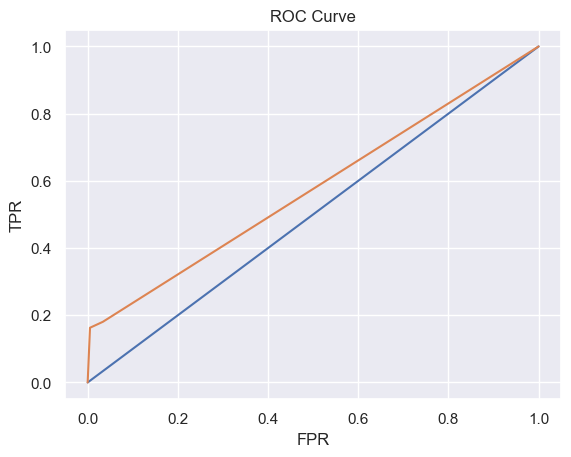

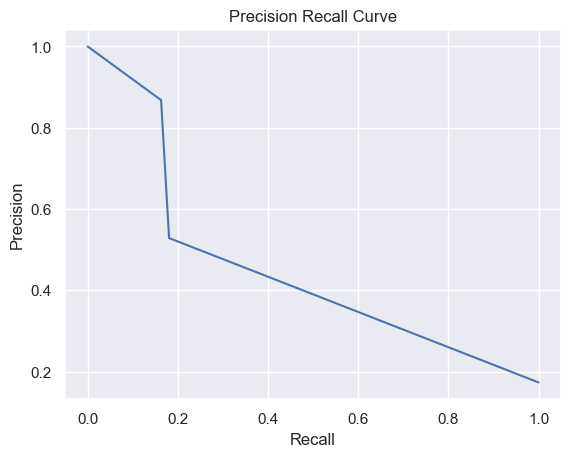

KNeighborsClassifier()
Accuracy: 0.31729000613120784
F1: 0.3190218185156798
Precision: 0.6298734202584348
Recall: 0.31729000613120784
Confusion Matrix: [[ 464 1617   12]
 [ 108  485   11]
 [  79  400   86]]
Classification Report:               precision    recall  f1-score   support

           0       0.71      0.22      0.34      2093
           1       0.19      0.80      0.31       604
           2       0.79      0.15      0.26       565

    accuracy                           0.32      3262
   macro avg       0.57      0.39      0.30      3262
weighted avg       0.63      0.32      0.32      3262



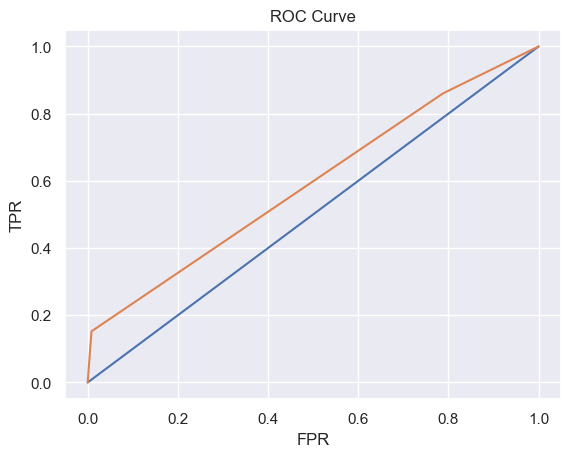

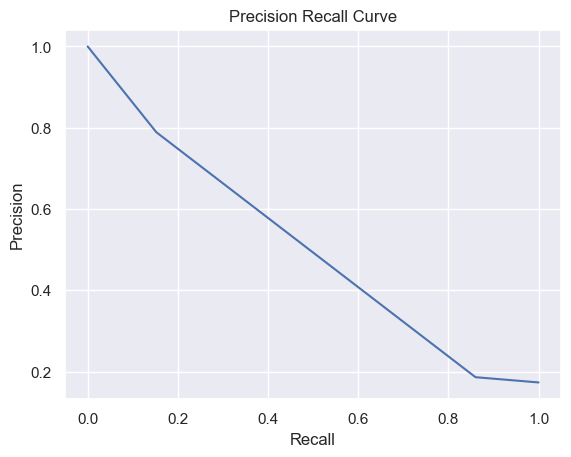

In [88]:
#let's fit the models and plot the curves
models = [LR,MNB,KNN]
for model in models:
    model.fit(X_train1,y_train1)
    y_pred = model.predict(X_test1)
    print(model)
    print('Accuracy:',accuracy_score(y_test1,y_pred))
    print('F1:',f1_score(y_test1,y_pred,average='weighted'))
    print('Precision:',precision_score(y_test1,y_pred,average='weighted'))
    print('Recall:',recall_score(y_test1,y_pred,average='weighted'))
    print('Confusion Matrix:',confusion_matrix(y_test1,y_pred))
    print('Classification Report:',classification_report(y_test1,y_pred))
    #plotting the roc curve
    fpr, tpr, thresholds = roc_curve(y_test1, y_pred, pos_label=2)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    # Plotting our Baseline..
    plt.plot([0,1],[0,1])
    plt.plot(fpr, tpr)
    plt.title('ROC Curve')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()
    #plotting the precision recall curve
    precision, recall, thresholds = precision_recall_curve(y_test1, y_pred, pos_label=2)
    plt.figure()
    plt.plot(recall, precision)
    plt.title('Precision Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()
   




In [89]:
#retraining the best model
LR.fit(X_train,y_train)
MNB.fit(X_train,y_train)
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [90]:
#dumping the model for the web app
joblib.dump(tf,'tf')
joblib.dump(LR,'model')
joblib.dump(MNB,'model1')
joblib.dump(KNN,'model2')


['model2']

In [91]:
final_df

sentiment                                         final_text
0              1                                           dhepburn
1              2       plus youve added commercial experience tacky
2              1       didnt today must mean need take another trip
3              0  really aggressive blast obnoxious entertainmen...
4              0                               really big bad thing
...          ...                                                ...
23027          2  pleasantly surprised xl airway critical review...
23125          2  small bottle water cup coffee certainly easy e...
23136          2  impressed seat marketed business class lite ie...
23152          2  first time zipair bit leery flying far budget ...
23169          2  zipair jals budget dont class travel pick seat...

[16307 rows x 2 columns]

In [304]:
import pandas as pd
from datasets import Dataset
from sklearn.model_selection import train_test_split



# Split into train and test sets
train_df, test_df = train_test_split(final_df, test_size=0.2, random_state=42)

# Convert to Hugging Face Dataset
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)


In [307]:
#importing the initializing for distilbert
from transformers import AutoTokenizer, AutoModelForSequenceClassification


#creating the model and the tokenizer 
model_checkpoint = "distilbert-base-uncased"   
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=3)


#preprocessig function for the transformer
def preprocess_function(examples):
    return tokenizer(examples["final_text"], truncation=True, padding=True)


#mapping the dataset
train_dataset = train_dataset.map(preprocess_function, batched=True)
test_dataset = test_dataset.map(preprocess_function, batched=True)

# Set format for PyTorch
train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])
test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

c:\Users\shaag\miniconda3\envs\torch\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/13045 [00:00<?, ? examples/s]

Map:   0%|          | 0/3262 [00:00<?, ? examples/s]

In [308]:
train_dataset

Dataset({
    features: ['label', 'final_text', '__index_level_0__', 'input_ids', 'attention_mask'],
    num_rows: 13045
})

In [309]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="steps",  # Evaluate and save model every `eval_steps` and `save_steps`
    save_strategy="steps",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=500,
    save_steps=500,
    eval_steps=500,
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    report_to="none",
    fp16=True  # Use mixed precision training if supported
)


In [310]:
#creating a metric function to evaluate the transformer
import numpy as np
import evaluate

metric = evaluate.load("accuracy")

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    return metric.compute(predictions=preds, references=p.label_ids)


In [313]:
#creating a customer Trainer for the transformer
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# Train the model
trainer.train()


  0%|          | 0/2448 [00:00<?, ?it/s]

{'loss': 0.6336, 'grad_norm': 4.598452091217041, 'learning_rate': 1.593137254901961e-05, 'epoch': 0.61}


  0%|          | 0/204 [00:00<?, ?it/s]

{'eval_loss': 0.5660828351974487, 'eval_accuracy': 0.7740649908031882, 'eval_runtime': 4.4049, 'eval_samples_per_second': 740.532, 'eval_steps_per_second': 46.312, 'epoch': 0.61}
{'loss': 0.5023, 'grad_norm': 4.335906505584717, 'learning_rate': 1.1854575163398693e-05, 'epoch': 1.23}


  0%|          | 0/204 [00:00<?, ?it/s]

{'eval_loss': 0.5398476719856262, 'eval_accuracy': 0.7949110974862048, 'eval_runtime': 4.4161, 'eval_samples_per_second': 738.663, 'eval_steps_per_second': 46.195, 'epoch': 1.23}
{'loss': 0.4298, 'grad_norm': 13.521902084350586, 'learning_rate': 7.769607843137256e-06, 'epoch': 1.84}


  0%|          | 0/204 [00:00<?, ?it/s]

{'eval_loss': 0.5228095054626465, 'eval_accuracy': 0.7900061312078479, 'eval_runtime': 4.569, 'eval_samples_per_second': 713.947, 'eval_steps_per_second': 44.649, 'epoch': 1.84}
{'loss': 0.3566, 'grad_norm': 9.685819625854492, 'learning_rate': 3.6846405228758173e-06, 'epoch': 2.45}


  0%|          | 0/204 [00:00<?, ?it/s]

{'eval_loss': 0.542041540145874, 'eval_accuracy': 0.7976701410177806, 'eval_runtime': 4.5607, 'eval_samples_per_second': 715.244, 'eval_steps_per_second': 44.73, 'epoch': 2.45}
{'train_runtime': 300.7605, 'train_samples_per_second': 130.12, 'train_steps_per_second': 8.139, 'train_loss': 0.4524570290559258, 'epoch': 3.0}


TrainOutput(global_step=2448, training_loss=0.4524570290559258, metrics={'train_runtime': 300.7605, 'train_samples_per_second': 130.12, 'train_steps_per_second': 8.139, 'total_flos': 4996850458785984.0, 'train_loss': 0.4524570290559258, 'epoch': 3.0})

In [314]:
#Evaluate the model
eval_results = trainer.evaluate()
print(f"Evaluation results: {eval_results}")

  0%|          | 0/204 [00:00<?, ?it/s]

Evaluation results: {'eval_loss': 0.542041540145874, 'eval_accuracy': 0.7976701410177806, 'eval_runtime': 4.5512, 'eval_samples_per_second': 716.733, 'eval_steps_per_second': 44.823, 'epoch': 3.0}


In [315]:
import torch

# Ensure device is set correctly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

def predict(texts):
    encodings = tokenizer(texts, truncation=True, padding=True, max_length=128, return_tensors="pt")
    
    # Move input tensors to the correct device
    input_ids = encodings["input_ids"].to(device)
    attention_mask = encodings["attention_mask"].to(device)
    
    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predictions = np.argmax(logits.cpu().numpy(), axis=1) 
    
    return predictions

# Example usage
example_texts = ["I love this product!", "This is the worst experience ever."]
predictions = predict(example_texts)
print(f"Predictions: {predictions}")


Predictions: [2 0]


In [316]:
# Save the model and tokenizer
model.save_pretrained("./saved_model")
tokenizer.save_pretrained("./saved_model")

('./saved_model\\tokenizer_config.json',
 './saved_model\\special_tokens_map.json',
 './saved_model\\vocab.txt',
 './saved_model\\added_tokens.json',
 './saved_model\\tokenizer.json')

In [317]:
pip install SentencePiece

Note: you may need to restart the kernel to use updated packages.


In [318]:
from transformers import AlbertTokenizer, AlbertForSequenceClassification, TrainingArguments, Trainer

# Load tokenizer and model
tokenizer = AlbertTokenizer.from_pretrained("albert-base-v2")
model = AlbertForSequenceClassification.from_pretrained("albert-base-v2", num_labels=3)



c:\Users\shaag\miniconda3\envs\torch\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [323]:
final_df.reset_index(drop=True,inplace=True)

In [324]:
import pandas as pd
from datasets import Dataset
from sklearn.model_selection import train_test_split



# Split into train and test sets
train_df, test_df = train_test_split(final_df, test_size=0.2, random_state=42)

# Convert to Hugging Face Dataset
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)


In [325]:
from transformers import AutoTokenizer
#pre processfunction for the transformer

def preprocess_function(examples):
    return tokenizer(examples["final_text"], truncation=True, padding=True)


#mapping the dataset
train_dataset = train_dataset.map(preprocess_function, batched=True)
test_dataset = test_dataset.map(preprocess_function, batched=True)

# Set format for PyTorch
train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])
test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

Map:   0%|          | 0/13045 [00:00<?, ? examples/s]

Map:   0%|          | 0/3262 [00:00<?, ? examples/s]

In [326]:
# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
)

In [327]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# Train the model
trainer.train()


  0%|          | 0/4893 [00:00<?, ?it/s]

{'loss': 0.7024, 'grad_norm': 42.36977767944336, 'learning_rate': 1.7972613938279175e-05, 'epoch': 0.31}
{'loss': 0.6265, 'grad_norm': 61.06085968017578, 'learning_rate': 1.5932965460862457e-05, 'epoch': 0.61}
{'loss': 0.5699, 'grad_norm': 16.856355667114258, 'learning_rate': 1.389331698344574e-05, 'epoch': 0.92}


  0%|          | 0/408 [00:00<?, ?it/s]

{'eval_loss': 0.5280075669288635, 'eval_accuracy': 0.7823421213979154, 'eval_runtime': 17.1997, 'eval_samples_per_second': 189.654, 'eval_steps_per_second': 23.721, 'epoch': 1.0}
{'loss': 0.5314, 'grad_norm': 32.869964599609375, 'learning_rate': 1.184958103413039e-05, 'epoch': 1.23}
{'loss': 0.5025, 'grad_norm': 41.90312576293945, 'learning_rate': 9.814020028612305e-06, 'epoch': 1.53}
{'loss': 0.4882, 'grad_norm': 23.72021484375, 'learning_rate': 7.774371551195586e-06, 'epoch': 1.84}


  0%|          | 0/408 [00:00<?, ?it/s]

{'eval_loss': 0.5412281155586243, 'eval_accuracy': 0.7909258123850399, 'eval_runtime': 17.0853, 'eval_samples_per_second': 190.925, 'eval_steps_per_second': 23.88, 'epoch': 2.0}
{'loss': 0.4399, 'grad_norm': 27.42001724243164, 'learning_rate': 5.730635601880238e-06, 'epoch': 2.15}
{'loss': 0.3947, 'grad_norm': 3.215705156326294, 'learning_rate': 3.6868996525648886e-06, 'epoch': 2.45}
{'loss': 0.3941, 'grad_norm': 21.569780349731445, 'learning_rate': 1.6431637032495403e-06, 'epoch': 2.76}


  0%|          | 0/408 [00:00<?, ?it/s]

{'eval_loss': 0.6021543145179749, 'eval_accuracy': 0.7973635806253832, 'eval_runtime': 18.2339, 'eval_samples_per_second': 178.897, 'eval_steps_per_second': 22.376, 'epoch': 3.0}
{'train_runtime': 735.5672, 'train_samples_per_second': 53.204, 'train_steps_per_second': 6.652, 'train_loss': 0.505161733683842, 'epoch': 3.0}


TrainOutput(global_step=4893, training_loss=0.505161733683842, metrics={'train_runtime': 735.5672, 'train_samples_per_second': 53.204, 'train_steps_per_second': 6.652, 'total_flos': 841176088095456.0, 'train_loss': 0.505161733683842, 'epoch': 3.0})

In [328]:
# Evaluate the model
results = trainer.evaluate()
print(f"Evaluation results: {results}")



  0%|          | 0/408 [00:00<?, ?it/s]

Evaluation results: {'eval_loss': 0.6021543145179749, 'eval_accuracy': 0.7973635806253832, 'eval_runtime': 19.0954, 'eval_samples_per_second': 170.826, 'eval_steps_per_second': 21.366, 'epoch': 3.0}


In [330]:
import torch
# Ensure device is set correctly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

def predict(texts):
    encodings = tokenizer(texts, truncation=True, padding=True, max_length=128, return_tensors="pt")
    
    # Move input tensors to the correct device
    input_ids = encodings["input_ids"].to(device)
    attention_mask = encodings["attention_mask"].to(device)
    
    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predictions = np.argmax(logits.cpu().numpy(), axis=1)  # Move logits to CPU for numpy operations
    
    return predictions

# Example usage
example_texts = ["I love this product!", "This is the worst experience ever."]
predictions = predict(example_texts)
print(f"Predictions: {predictions}")


Predictions: [2 0]
